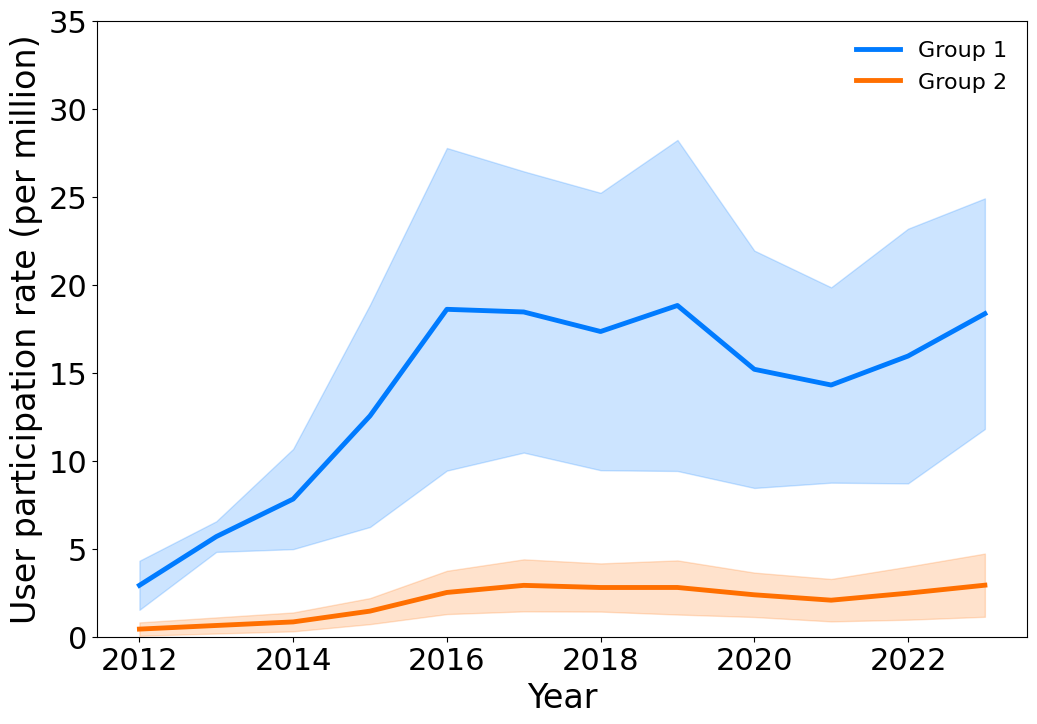

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取数据
df = pd.read_csv(r"normalized_posts_with_provinces.csv")

# 映射index值到自定义的文本
index_map = {1: 'Group 1', 2: 'Group 2'}
df['index'] = df['index'].map(index_map)

# 过滤掉2011年的数据
df = df[df['year'] != 2011]

# 手动处理无穷大值，例如将它们替换为NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# 设置颜色
# colors = ['#E89DA0','#88CEE6']
colors = ['#007BFF','#FF6F00']

# 计算每个组别的平均值和标准差
grouped = df.groupby(['year', 'index'])['normalized_users'].agg(['mean', 'std']).reset_index()

# 使用matplotlib绘制每类index的normalized_users折线图，包括标准差
plt.figure(figsize=(12, 8))  # 设置图表大小
for i, (name, group) in enumerate(grouped.groupby('index')):
    plt.plot(group['year'], group['mean'], label=name, color=colors[i % len(colors)], linewidth=3.5)
    plt.fill_between(group['year'], group['mean'] - group['std'], group['mean'] + group['std'],
                     color=colors[i % len(colors)], alpha=0.2)

# 设置图表标题和轴标签
plt.xlabel('Year', fontsize=24)
plt.ylabel('User participation rate (per million)', fontsize=24)

plt.xticks(rotation=0, fontsize=22)
plt.yticks(fontsize=22)
plt.ylim(0, 35)
# 添加图例，去掉边框
plt.legend(frameon=False, fontsize=16)

# 显示图表
plt.show()